In [1]:
import numpy as np
import matplotlib.pyplot as plt

# Brief overview of Numpy matrix operations

- `A.dot(x) == b` or `np.matmul(A, x) == b` or `A @ x == b`
- `numpy.linalg.inv(M)`
- `M.T` or `M.transpose()` or `numpy.transpose(M)`

Pick one way of doing each and stick with it. I prefer `@` and `M.T` as they are the most concise.

In [2]:
M = [
    [1,2,3],
    [4,5,6],
    [7,8,9]
]

M

[[1, 2, 3], [4, 5, 6], [7, 8, 9]]

In [3]:
print(type(M))
M = np.array(M)
print(type(M))

M

<class 'list'>
<class 'numpy.ndarray'>


array([[1, 2, 3],
       [4, 5, 6],
       [7, 8, 9]])

In [4]:
# transpose by slicing

M_transpose = np.array([M[:,0], M[:,1], M[:,2]])

M_transpose, M.T

(array([[1, 4, 7],
        [2, 5, 8],
        [3, 6, 9]]),
 array([[1, 4, 7],
        [2, 5, 8],
        [3, 6, 9]]))

In [5]:
# not as easy to compute the inverse.

np.linalg.inv(M)

array([[-4.50359963e+15,  9.00719925e+15, -4.50359963e+15],
       [ 9.00719925e+15, -1.80143985e+16,  9.00719925e+15],
       [-4.50359963e+15,  9.00719925e+15, -4.50359963e+15]])

In [6]:
# but for 2d we can use determinatent

A = np.array([[1,2], [3,4]])

A_inv = (1/np.linalg.det(A))*np.array([[A[1,1], -A[0,1]], [-A[1,0], A[0,0]]])

A_inv, np.linalg.inv(A)

(array([[-2. ,  1. ],
        [ 1.5, -0.5]]),
 array([[-2. ,  1. ],
        [ 1.5, -0.5]]))

In [7]:
ones = np.ones((3,3))
zeros = np.eye(3)
zeros[2,2] = 99
ones, zeros

(array([[1., 1., 1.],
        [1., 1., 1.],
        [1., 1., 1.]]),
 array([[ 1.,  0.,  0.],
        [ 0.,  1.,  0.],
        [ 0.,  0., 99.]]))

In [8]:
ones*zeros

array([[ 1.,  0.,  0.],
       [ 0.,  1.,  0.],
       [ 0.,  0., 99.]])

In [9]:
ones.dot(zeros), np.matmul(ones, zeros), ones@zeros

(array([[ 1.,  1., 99.],
        [ 1.,  1., 99.],
        [ 1.,  1., 99.]]),
 array([[ 1.,  1., 99.],
        [ 1.,  1., 99.],
        [ 1.,  1., 99.]]),
 array([[ 1.,  1., 99.],
        [ 1.,  1., 99.],
        [ 1.,  1., 99.]]))

In [10]:
zeros.dot(ones), np.matmul(zeros, ones), zeros@ones

(array([[ 1.,  1.,  1.],
        [ 1.,  1.,  1.],
        [99., 99., 99.]]),
 array([[ 1.,  1.,  1.],
        [ 1.,  1.,  1.],
        [99., 99., 99.]]),
 array([[ 1.,  1.,  1.],
        [ 1.,  1.,  1.],
        [99., 99., 99.]]))

# Change of basis

Change of basis is a linear transformation. 

It is represented by a matrix where the columns are the basis vectors of the new basis.

*Note: When switching between two non-standard bases, the columns of the matrix are the coordinates of the new basis vectors in the old basis.*

Suppose point $(x,y,z)$ in standard coordinates is same as point $(u,v,w)$ in coordinates basis $B$ $$ \begin{bmatrix} x \\ y \\ z \end{bmatrix} = \begin{bmatrix} u \\ v \\ w \end{bmatrix}_B $$


Then we can write the following equation $$ \begin{bmatrix} x \\ y \\ z \end{bmatrix} = \begin{bmatrix} u \\ v \\ w \end{bmatrix}_B = \begin{bmatrix} b_{11} & b_{12} & b_{13} \\ b_{21} & b_{22} & b_{23} \\ b_{31} & b_{32} & b_{33} \end{bmatrix} \begin{bmatrix} x \\ y \\ z \end{bmatrix} $$

Where the columns of the matrix are the basis vectors of the new basis $B$.


$$ \begin{bmatrix} x \\ y \\ z \end{bmatrix} \ = \ \begin{bmatrix} u \\ v \\ w \end{bmatrix}_B $$

$$ \begin{bmatrix} 1 & 0 & 0 \\ 0 & 1 & 0 \\ 0 & 0 & 1 \end{bmatrix} \begin{bmatrix} x \\ y \\ z \end{bmatrix} = \begin{bmatrix} b_{11} & b_{12} & b_{13} \\ b_{21} & b_{22} & b_{23} \\ b_{31} & b_{32} & b_{33} \end{bmatrix} \begin{bmatrix} u \\ v \\ w \end{bmatrix} $$

which implies



$$ \begin{bmatrix} x \\ y \\ z \end{bmatrix} = \begin{bmatrix} b_{11} & b_{12} & b_{13} \\ b_{21} & b_{22} & b_{23} \\ b_{31} & b_{32} & b_{33} \end{bmatrix} \begin{bmatrix} u \\ v \\ w \end{bmatrix} $$

and 

$$ \begin{bmatrix} b_{11} & b_{12} & b_{13} \\ b_{21} & b_{22} & b_{23} \\ b_{31} & b_{32} & b_{33} \end{bmatrix}^{-1} \begin{bmatrix} x \\ y \\ z \end{bmatrix} = \begin{bmatrix} u \\ v \\ w \end{bmatrix} $$

**SANITY CHECK:** 

- What are the basis vectors? 
- What are the coordinates of the point $(x,y,z)$ in the new basis?
- What are the coordinates of the point $(u,v,w)$ in the standard basis?

**Question to think about:** What would this look like when moving between two non-standard bases?

## Example

Consider the curve determined by the implicit relationship between variables $u$ and $v$

$$ \sin(u + v) - \cos(uv) = 1 $$

**a)** Plot the curve in the u-v plane.


In [11]:
def ellipse(u, v):
    return np.sin(u + v) - np.cos(u*v) + 1

def is_part(u, v, h=1e-2):
    if abs(ellipse(u, v)) < h:
        return True
    return False

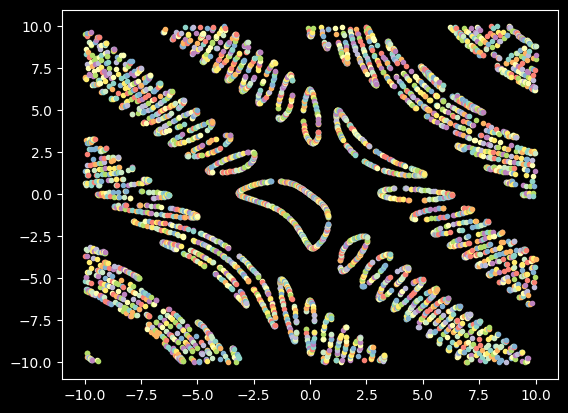

In [12]:
from itertools import product
import matplotlib.pyplot as plt

mesh = np.linspace(-10, 10, 1000)

POINTS_U = []

for u, v in product(*[mesh]*2):
    if is_part(u, v):
        plt.plot(u, v, '.')
        POINTS_U.append([u, v])

**b)** Suppose that we wish to change the basis from $u$ and $v$ to $x$ and $y$ where

$$ x = u + v $$
$$ y = uv $$

The basis matrix transform for this is

$$ \begin{bmatrix} 1 & 1 \\ \frac{v}{2} & \frac{u}{2} \end{bmatrix} $$

Find the equation of the curve in the $x-y$ plane.


$$ \sin(x) - \cos(y) = 1 $$

In [13]:
def ellipse_xy(x, y):
    return np.sin(x) - np.cos(y) + 1

def is_part_xy(x, y, h=1e-2):
    if abs(ellipse_xy(x, y)) < h:
        return True
    return False


**c)** Plot the curve in the $x-y$ plane by using the equation found in part b and also by matrix multiplication.

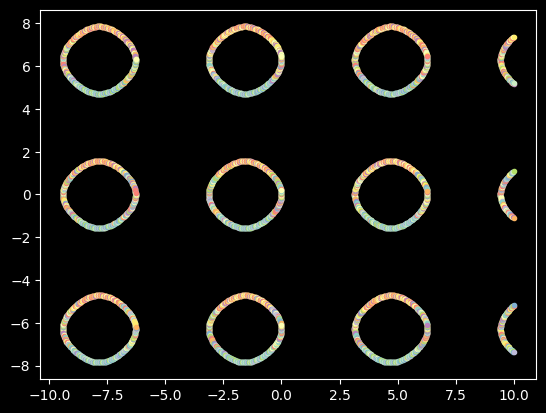

In [17]:
# via the new formula

from itertools import product
import matplotlib.pyplot as plt

mesh = np.linspace(-10, 10, 1000)

POINTS_XY_DIRECT = []

for x, y in product(*[mesh]*2):
    if is_part_xy(x, y):
        plt.plot(x, y, '.')
        POINTS_XY_DIRECT.append([x, y])

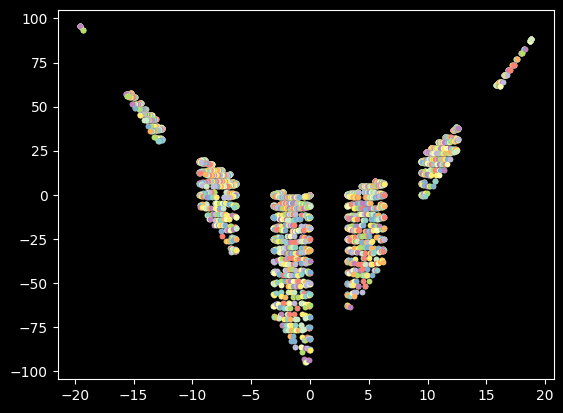

In [44]:
# via matrix transformation

#   this is not giving us what we want but i cannot figure it out... ..

POINTS_U_MATRIX = np.array(POINTS_U)
for u, v in POINTS_U_MATRIX:
    PT = np.array([[u], [v]])
    BASIS = np.array([[1,1],[v/2,u/2]])
    plt.plot(*BASIS.dot(PT), '.')

(2, 2) (4269, 2)


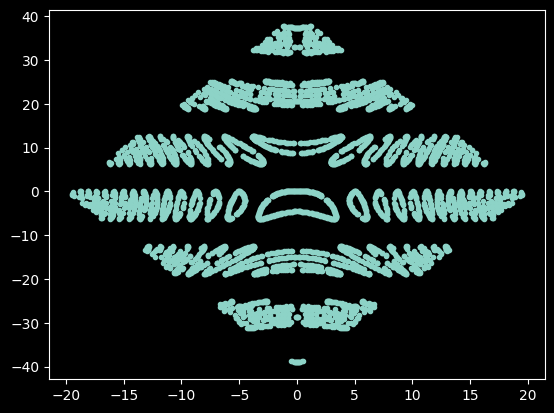

In [16]:
# basis from class example via matrix transformation

POINTS_U_CLASS = np.array(POINTS_U)

basis = np.array([[1,-1],[2,2]])
print(np.shape(basis), np.shape(POINTS_U_CLASS))
POINTS_XY_MATRIX = np.matmul(basis, POINTS_U_CLASS.T)

plt.plot(*POINTS_XY_MATRIX, '.')